# Assignment 1 specification

The purpose of this assignment is to use EDA on two of the datasets met in class.

## Which datasets to consider?

In [1]:
import random

# Students should replace 12345678 with their student id (8-digit number, starting with 200)
myStudentId = 20093711

# Use myStudentId as the seed for the random number generator
random.seed(myStudentId)

dataSetToIgnore = random.choice(['Tips', 'Titanic', 'Algae'])
dataSetToIgnore

'Algae'

Students should consider 2 sets from 'Tips', 'Titanic', 'Algae', ignoring the set that was randomly selected above.

##Start of EDA 1##

# Task 1: First pass - load data set and initial clean

##Start of Answer 1##

Reading in the Tips dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm


Tips = pd.read_csv('C:/Users/willi/OneDrive/Desktop/Data Mining/CA1/eda_datasets/01-Tips/tips.csv')
Tips.head(10)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


Checking what type all the column are and seeing what columns need to be changed to categorical.

In [3]:
Tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


Changing column sex to categorical in the tips dataset.

In [4]:
Tips.sex = pd.Categorical(Tips.sex)
Tips.sex.unique()

['Female', 'Male']
Categories (2, object): ['Female', 'Male']

Changing column day to categorical in the tips dataset.

In [5]:
Tips.day = pd.Categorical(Tips.day, categories=['Thur', 'Fri','Sat', 'Sun'], ordered=True)
Tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur' < 'Fri' < 'Sat' < 'Sun']

Changing column smoker to categorical in the tips dataset.

In [6]:
Tips.smoker = pd.Categorical(Tips.smoker)
Tips.smoker.unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

Changing column time to categorical in the tips dataset.

In [7]:
Tips.time = pd.Categorical(Tips.time, categories=['Lunch', 'Dinner'], ordered=True)
Tips.time.unique()


['Dinner', 'Lunch']
Categories (2, object): ['Lunch' < 'Dinner']

Checking if columns were changed to categorical.

In [8]:
Tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


Saving result of initial clean to pickle format to keep dtype metadeta.

In [9]:
Tips.to_pickle('eda_datasets/updated_tips.pkl')

Reading in new updated tips dataset and displaying the first 10.

In [10]:
updated_tips = pd.read_pickle('eda_datasets/updated_tips.pkl')
print(updated_tips.shape)
updated_tips.head(10)

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


##End of Answer 1##

# Task 2: Second pass - individual features and target

##Start of Answer 2##

Checking how many males and how many females are in column sex.

In [11]:
updated_tips.sex.value_counts(normalize=True, dropna=False)

Male      0.643443
Female    0.356557
Name: sex, dtype: float64

Checking how many values are in column sex, how many variables and which is the most frequent variable.

In [12]:
updated_tips.sex.describe()

count      244
unique       2
top       Male
freq       157
Name: sex, dtype: object

In [13]:
updated_tips.sex.unique()

['Female', 'Male']
Categories (2, object): ['Female', 'Male']

The sex countplot below shows that there are nearly double the amount of males(under 160) to females(over 80).

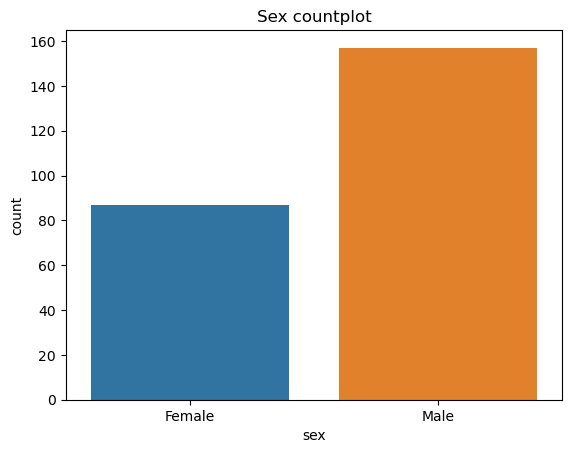

In [14]:
plt.title("Sex countplot")
sns.countplot(x="sex", data=updated_tips);

Checking how many smokers and how many non smokers are in column smoker.

In [15]:
updated_tips.smoker.value_counts(normalize=True, dropna=False)

No     0.618852
Yes    0.381148
Name: smoker, dtype: float64

Checking how many values are in column smoker, how many variables and which is the most frequent variable.

In [16]:
updated_tips.smoker.describe()

count     244
unique      2
top        No
freq      151
Name: smoker, dtype: object

In [17]:
updated_tips.smoker.unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

The smoker countplot below shows that there are over 140 non smokers and just under 100 smokers.

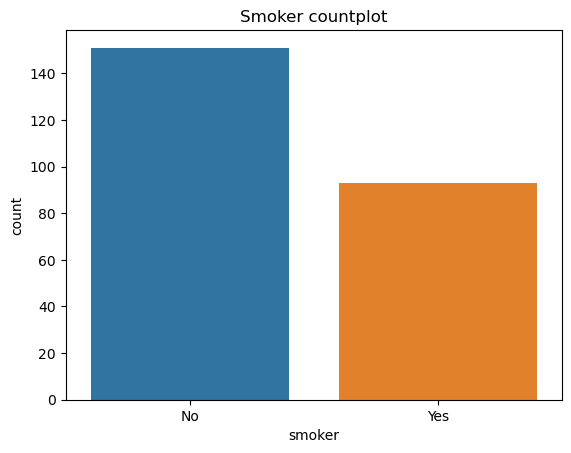

In [18]:
plt.title("Smoker countplot")
sns.countplot(x="smoker", data=updated_tips);

Checking how many days are in column day.

In [19]:
updated_tips.day.value_counts(normalize=True, dropna=False)

Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: day, dtype: float64

In [20]:
updated_tips.tip.value_counts(normalize=True, dropna=False)

2.00    0.135246
3.00    0.094262
4.00    0.049180
5.00    0.040984
2.50    0.040984
          ...   
4.34    0.004098
1.56    0.004098
5.20    0.004098
2.60    0.004098
1.75    0.004098
Name: tip, Length: 123, dtype: float64

In [21]:
updated_tips.total_bill.value_counts(normalize=True, dropna=False)

13.42    0.012295
13.81    0.008197
15.98    0.008197
17.92    0.008197
10.07    0.008197
           ...   
24.71    0.004098
21.16    0.004098
28.97    0.004098
22.49    0.004098
18.78    0.004098
Name: total_bill, Length: 229, dtype: float64

In [22]:
updated_tips.day.describe()

count     244
unique      4
top       Sat
freq       87
Name: day, dtype: object

In [23]:
updated_tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur' < 'Fri' < 'Sat' < 'Sun']

The day countplot below shows that the busiest day was saturday, sunday was the second busiest, thursday was the 3rd busiest and friday was the lease busiest day.

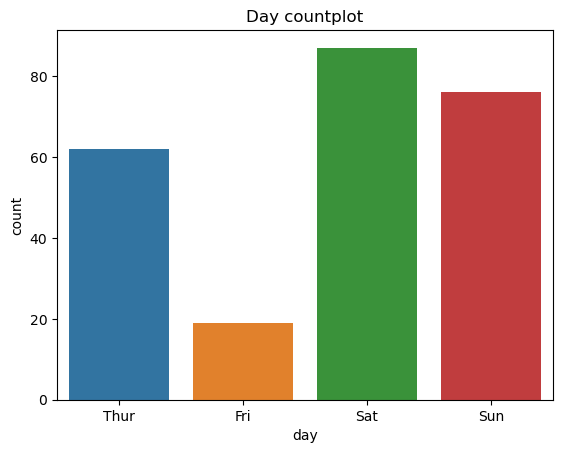

In [24]:
plt.title("Day countplot")
sns.countplot(x="day", data=updated_tips);

In [25]:
updated_tips.time.value_counts(normalize=True, dropna=False)

Dinner    0.721311
Lunch     0.278689
Name: time, dtype: float64

In [26]:
updated_tips.time.describe()

count        244
unique         2
top       Dinner
freq         176
Name: time, dtype: object

In [27]:
updated_tips.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch' < 'Dinner']

The time countplot below shows that dinner was the most populare timeslot by over double the lunchtime.

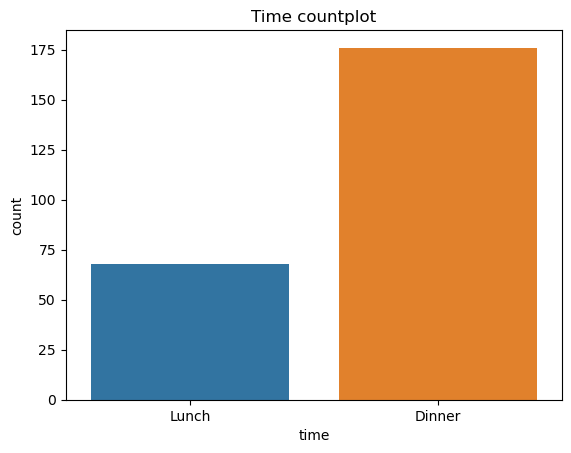

In [28]:
plt.title("Time countplot")
sns.countplot(x="time", data=updated_tips);

The total bill histplot below shows that the average price of total bill is around 15, the most expensive total bill was over 50.

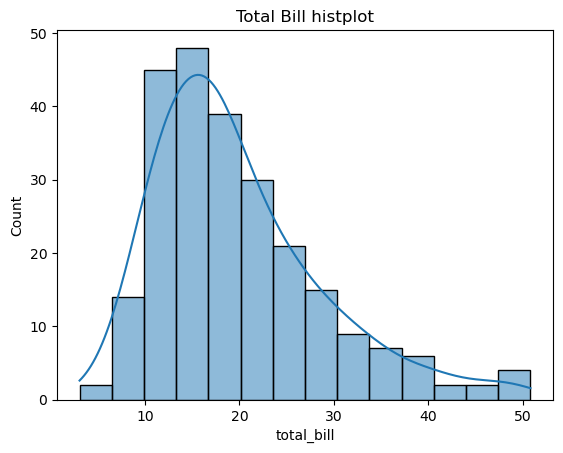

In [29]:
plt.title("Total Bill histplot")
sns.histplot(x="total_bill", data= updated_tips, kde=True);

The tip histplot below shows that the average tip was between 2 to 4 and the max tip being 10.

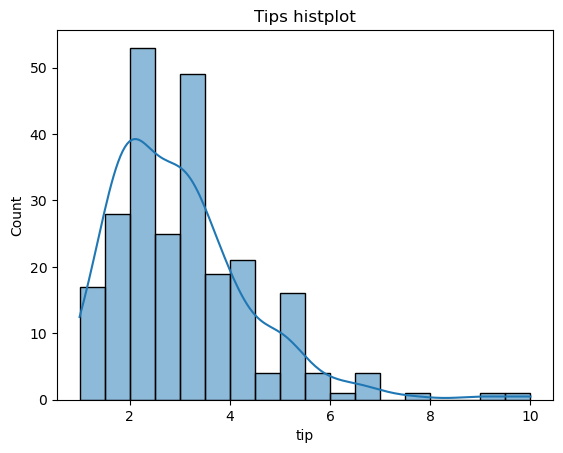

In [30]:
plt.title("Tips histplot")
sns.histplot(x="tip", data= updated_tips, kde=True);

The size histplot below shows that the most often group size is 2 and the largest group size is 6

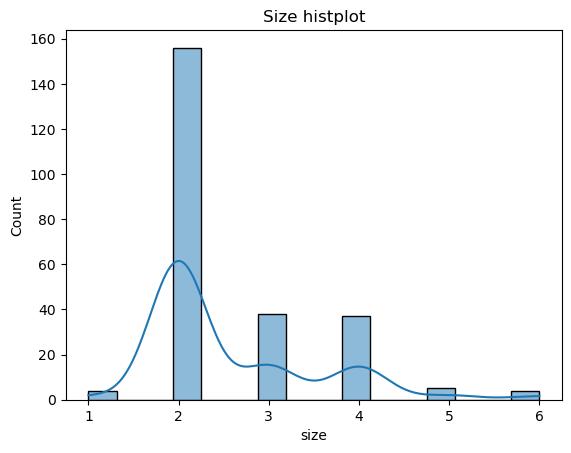

In [40]:
plt.title("Size histplot")
sns.histplot(x="size", data= updated_tips, kde=True);

The numerical boxplots below show the average in total_bill, tip and size.

<Axes: title={'center': 'Numerical Boxplots'}>

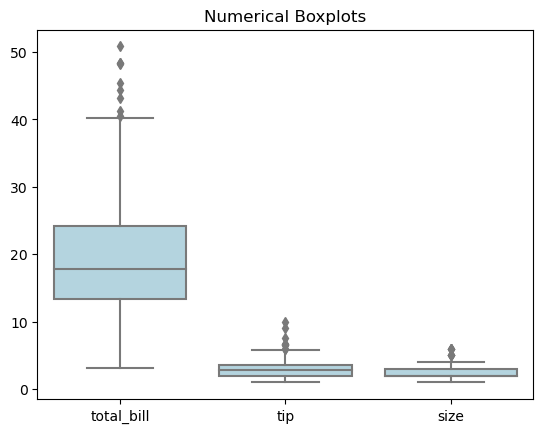

In [41]:
plt.title("Numerical Boxplots")
sns.boxplot(data=updated_tips, color="lightblue")

Checking if there is a relationship between total_bill and tip.

In [42]:
updated_tips[["total_bill", "tip"]].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


the implot of total_bill and tip below measures the strength of the  linear relationship between total_bill and tip. Correlation coefficient, r = 0.68, shows there is a strong positive linear relationship between total_bill and tip because tips increase with more expensive total bill.

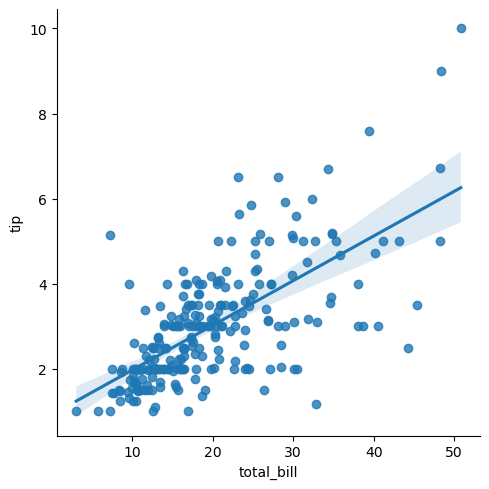

In [43]:
sns.lmplot(x="total_bill", y="tip", data= updated_tips);

Checking if there is a relationship between total_bill and size.

In [44]:
updated_tips[["total_bill", "size"]].corr()

,total_bill,size
total_bill,1.000000,0.598315
size,0.598315,1.000000


the implot of total_bill and size below measures the strength of the  linear relationship between total_bill and size. Correlation coefficient, r = 0.60, shows there is a strong positive linear relationship between total_bill and size because the total bill is more expensive with a bigger group size.

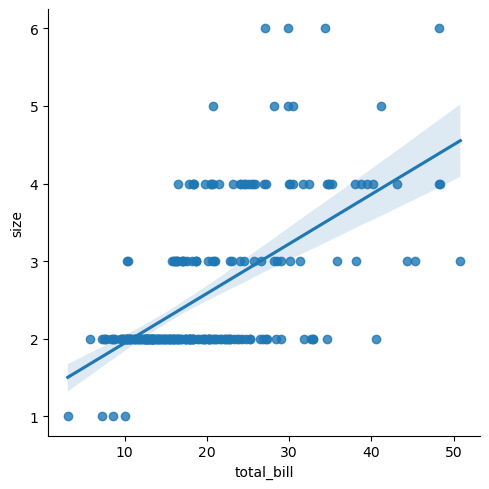

In [45]:
sns.lmplot(x="total_bill", y="size", data= updated_tips);

Checking if there is a relationship between tip and size.

In [46]:
updated_tips[["size", "tip"]].corr()

,size,tip
size,1.000000,0.489299
tip,0.489299,1.000000


the implot of tip and size below measures the strength of the  linear relationship between tip and size. Correlation coefficient, r = 0.49, shows There is a moderate positive linear relationship between tip and size because the tip increases slightly with a bigger group size.

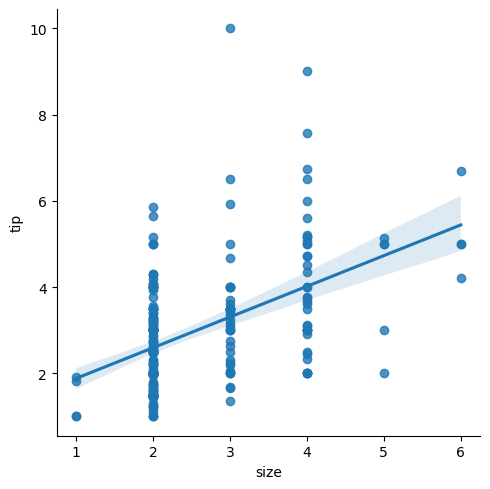

In [47]:
sns.lmplot(x="size", y="tip", data= updated_tips);

The size countplot below shows that the most often group size is 2 and the largest group size is 6

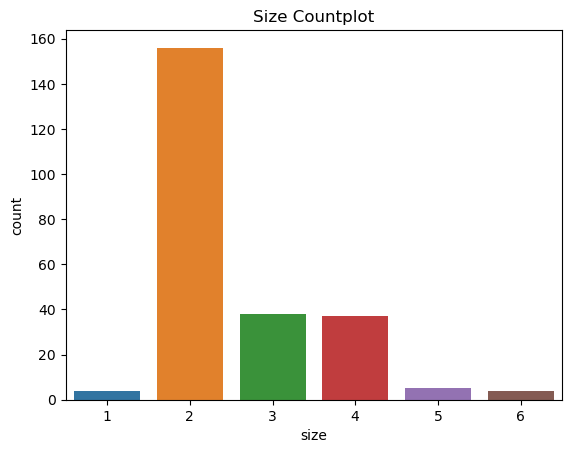

In [48]:
plt.title("Size Countplot")
sns.countplot(x="size", data=updated_tips);

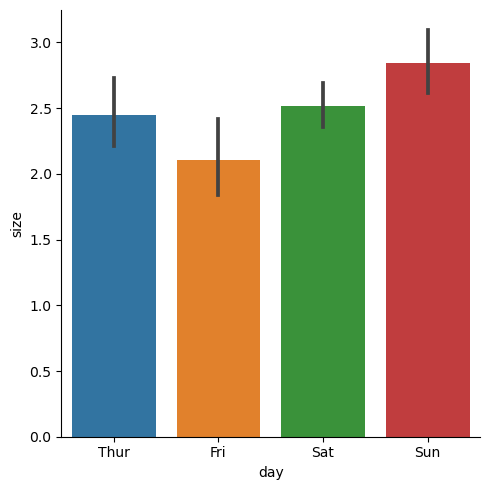

In [49]:
sns.catplot(x="day", y="size", data=updated_tips, kind='bar');

##End of Answer 2##

# Task 3: Third pass - relationships between features and target

##Start of Answer 3##

Checking if there is a relationship between total_bill, tip and size.

In [50]:
corr = updated_tips[["total_bill","tip", "size"]].corr()
corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


the heatmap of total_bill, tip and size below measures the strength of the  linear relationship between total_bill, tip and size. 
Correlation coefficient between total_bill and tip , r = 0.68, shows There is a strong positive linear relationship between total_bill and tip.
Correlation coefficient between total_bill and size , r = 0.6, shows There is a strong positive linear relationship between total_bill and size.
Correlation coefficient between tip and size , r = 0.49, shows There is a moderate positive linear relationship between tip and size.

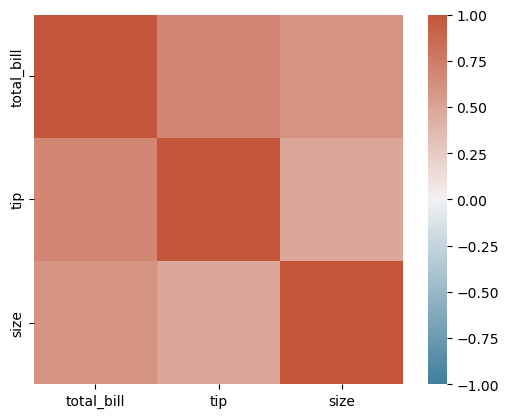

In [51]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, square=True, vmin= -1, vmax= 1, cmap=cmap);

Checking if there is a relationship between total_bill, tip and size using the spearman method.

In [52]:
corr = updated_tips[["total_bill","tip", "size"]].corr(method='spearman')
corr

,total_bill,tip,size
total_bill,1.000000,0.678968,0.604791
tip,0.678968,1.000000,0.468268
size,0.604791,0.468268,1.000000


the heatmap of total_bill, tip and size below measures the strength of the  linear relationship between total_bill, tip and size. 
Correlation coefficient between total_bill and tip , r = 0.68, shows There is a strong positive linear relationship between total_bill and tip.
Correlation coefficient between total_bill and size , r = 0.6, shows There is a strong positive linear relationship between total_bill and size.
Correlation coefficient between tip and size , r = 0.47, shows There is a moderate positive linear relationship between tip and size.

<Axes: >

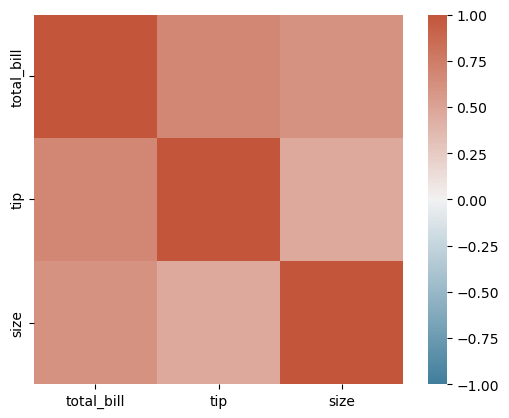

In [53]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, square=True, vmin=-1, vmax=1,cmap = cmap)

The scatterplot between total_bill, tip and size below shows the most often group size is 2, average price of a group of 2 is between 10 to 20 and average tip of a group of 2 is 2. There is a group size of 3 that had a total bill of 50 and a tip of 10.

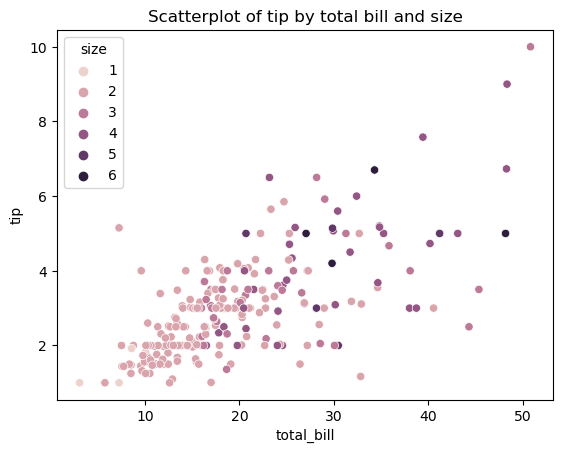

In [54]:
plt.title("Scatterplot of tip by total bill and size")
sns.scatterplot(x="total_bill", y="tip", hue="size", data=updated_tips);

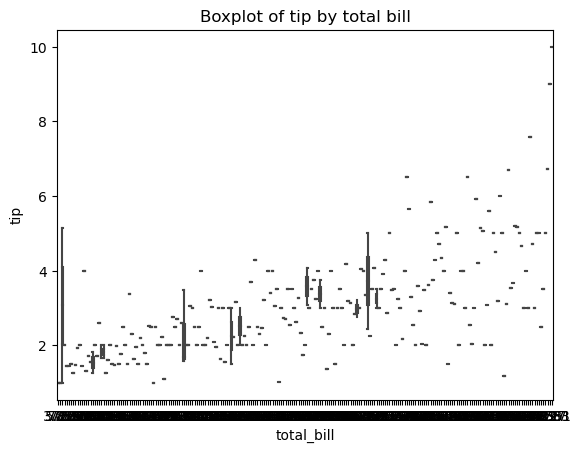

In [55]:
plt.title("Boxplot of tip by total bill")
sns.boxplot(x="total_bill", y="tip", data=updated_tips);

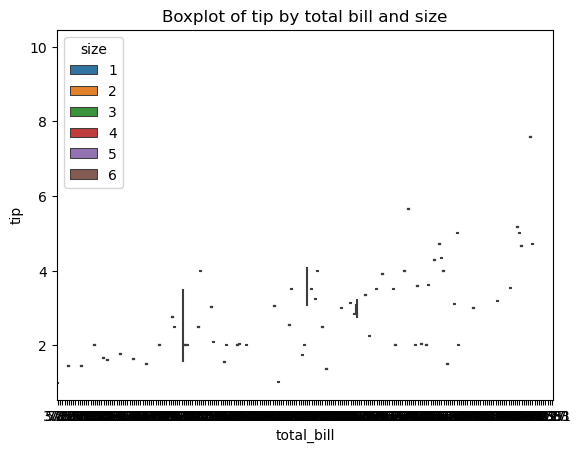

In [56]:
plt.title("Boxplot of tip by total bill and size")
sns.boxplot(x="total_bill", y="tip", hue="size", data=updated_tips);

The violin plot below shows the total bill by day and if the customer was a smoker or not a smoker. The biggest total bill was on sturday and it belonged to a smoker. The average amount of total bill was between 10 and 20 across all days. There were more smokers with higher total bills than no smokers.

Text(0.5, 1.0, 'Violin Plot of Total Bill by Day and Smoker')

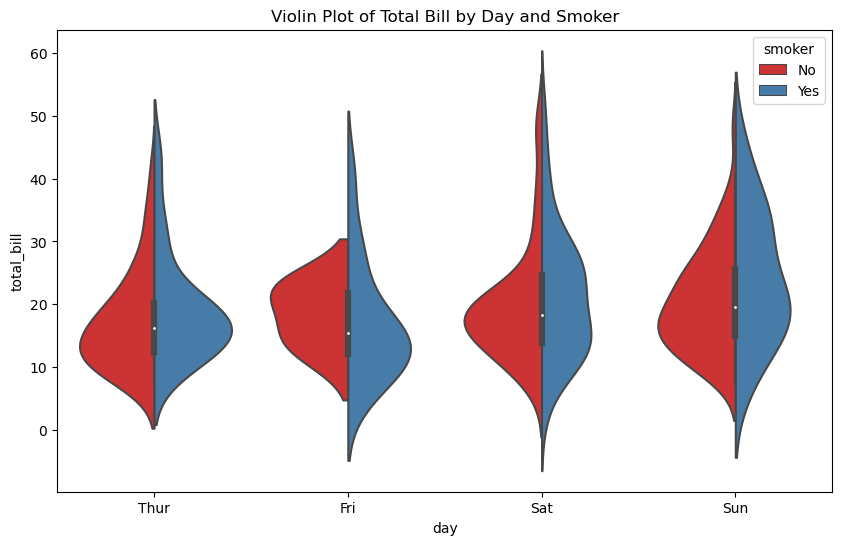

In [57]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="day", y="total_bill", hue="smoker", data=updated_tips, split=True, palette="Set1")
plt.title("Violin Plot of Total Bill by Day and Smoker")

The swarmplot below shows the total bill by day and by what sex the customer is. The day with the least amount of customers was friday. Saturday and sunday had more male customers than female customers. The average total bill was between 10 and 20. Most of the expensive total bills belonged to males.

<Axes: xlabel='total_bill', ylabel='day'>

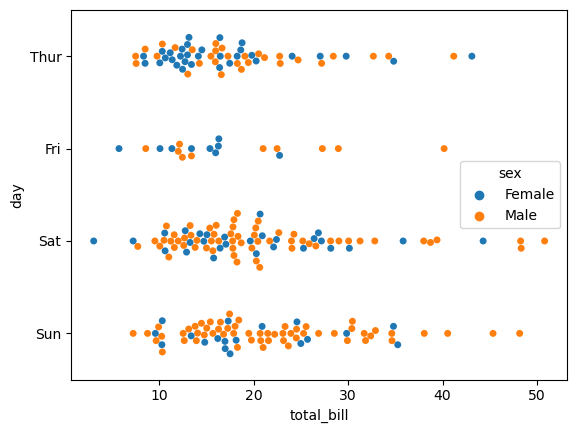

In [58]:
sns.swarmplot(data=updated_tips, x="total_bill", y="day", hue="sex")

The stripplot below shows the tip by day and by what sex the customer is. The day with the least amount of customers was friday. Saturday and sunday had more male customers that tipped than female customers. The average tip was between 2 and 4. The biggest tip was 10 and was given by a male.

<Axes: xlabel='tip', ylabel='day'>

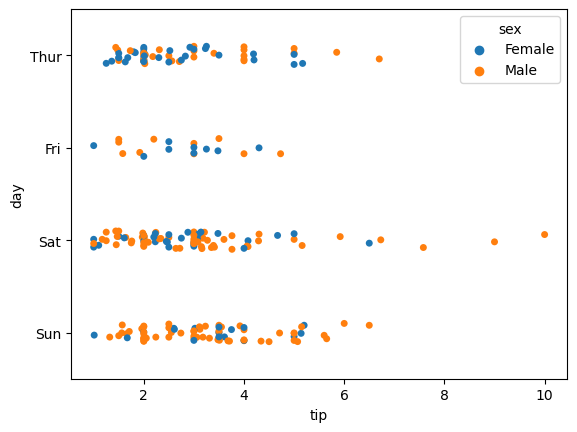

In [59]:
sns.stripplot(data=updated_tips, x="tip", y="day", hue="sex")

The swarmplot below shows the toal bill by day and by what Time it was (Lunch or dinner). The day with the least amount of customers was friday. Saturday and sunday had only customers who came at dinner time. The average total bill was between 10 and 20. Most of the expensive total bills were at dinner time.

<Axes: xlabel='total_bill', ylabel='day'>

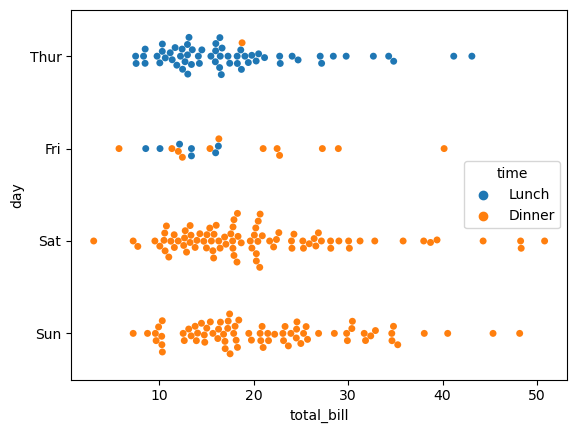

In [60]:
sns.swarmplot(data=updated_tips, x="total_bill", y="day", hue="time")

The stripplot below shows the tip by day and by what time it was (lunch or dinner). The day with the least amount of customer tips was friday. Saturday and sunday had only customers who came at dinner time and had the most tips. The average tip was between 2 and 4. The biggest tip was 10 and was given at dinner time on saturday.

<Axes: xlabel='tip', ylabel='day'>

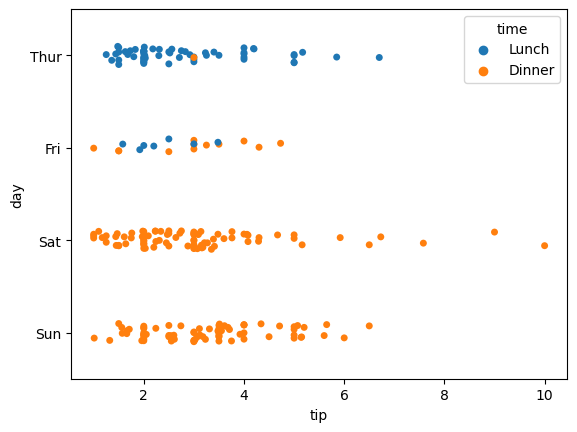

In [61]:
sns.stripplot(data=updated_tips, x="tip", y="day", hue="time")

##End of Answer 3##

##End of EDA 1##

##Start of EDA 2##

# Task 1: First pass - load data set and initial clean

##Start of Answer 1##

Reading in titanic dataset.

In [62]:
Titanic = pd.read_csv("C:/Users/willi/OneDrive/Desktop/Data Mining/CA1/eda_datasets/03-Titanic/train.csv")
print(Titanic.shape)
Titanic.head(25)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Checking what type all the column are and seeing what columns need to be changed to categorical.

In [63]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Changine Sex to categorical

In [64]:
Titanic.Sex = pd.Categorical(Titanic.Sex)
Titanic.Sex.unique()

['male', 'female']
Categories (2, object): ['female', 'male']

Changing Survived to categorical

In [66]:
Titanic.Survived = pd.Categorical(Titanic.Survived)
Titanic.Survived.unique()

[0, 1]
Categories (2, int64): [0, 1]

Checking if columns were changed to categorical.

In [67]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
dtypes: category(2), float64(2), int64(4), object(4)
memory usage: 71.7+ KB


Checking null values on titanic.

In [68]:
Titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Checking each value of each class.

In [69]:
print(Titanic.describe())

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean    446.000000    2.308642   29.699118    0.523008    0.381594   32.204208
std     257.353842    0.836071   14.526497    1.102743    0.806057   49.693429
min       1.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    2.000000   20.125000    0.000000    0.000000    7.910400
50%     446.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000    3.000000   38.000000    1.000000    0.000000   31.000000
max     891.000000    3.000000   80.000000    8.000000    6.000000  512.329200


Checking embarked values

In [70]:
print(Titanic.Embarked.describe())

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object


Created a new binary feature "Has_Cabin" to indicate whether "Cabin" is missing

In [71]:
Titanic['Has_Cabin'] = Titanic['Cabin'].notna()

Removed original Cabin column

In [72]:
Titanic.drop('Cabin', axis=1, inplace=True)

Filled age missing values with 29 since its the mean age.

In [73]:
Titanic['Age'].fillna(29, inplace=True)

Filled embarked missing values with "S" since its the most frequent value in embarked.

In [74]:
Titanic['Embarked'].fillna('S', inplace=True)

Checking all missing values are gone.

In [75]:
Titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64

Saving result of initial clean to pickle format to keep dtype metadeta.

In [76]:
Titanic.to_pickle('eda_datasets/updated_titanic.pkl')

Reading in new updated titanic dataset and displaying the first 10.

In [77]:
updated_titanic = pd.read_pickle('eda_datasets/updated_titanic.pkl')
print(updated_titanic.shape)
updated_titanic.head(10)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,Q,False
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,True
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,False
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,False
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,False


##End of Answer 1##

# Task 2: Second pass - individual features and target

##Start of Answer 2##

In [78]:
updated_titanic.Survived.value_counts(normalize=True, dropna=False)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [79]:
updated_titanic.Survived.describe()

count     891
unique      2
top         0
freq      549
Name: Survived, dtype: int64

In [80]:
updated_titanic.Survived.unique()

[0, 1]
Categories (2, int64): [0, 1]

The Survived countplot below shows how many people survied and did not survive.

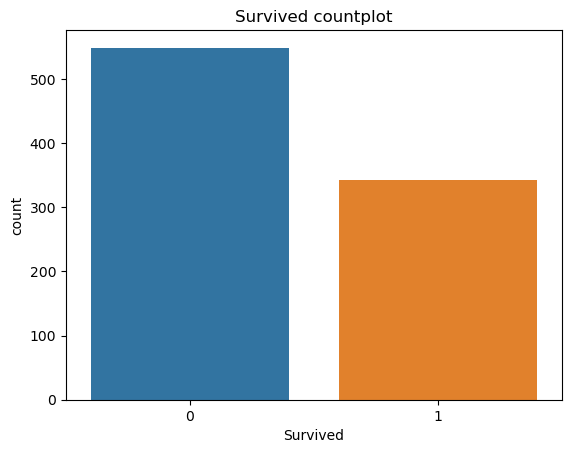

In [81]:
plt.title("Survived countplot")
sns.countplot(x="Survived", data=updated_titanic);

In [82]:
updated_titanic.Sex.value_counts(normalize=True, dropna=False)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [83]:
updated_titanic.Sex.describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [84]:
updated_titanic.Sex.unique()

['male', 'female']
Categories (2, object): ['female', 'male']

The Sex countplot below shows how many females and how many males were onboard the titanic.

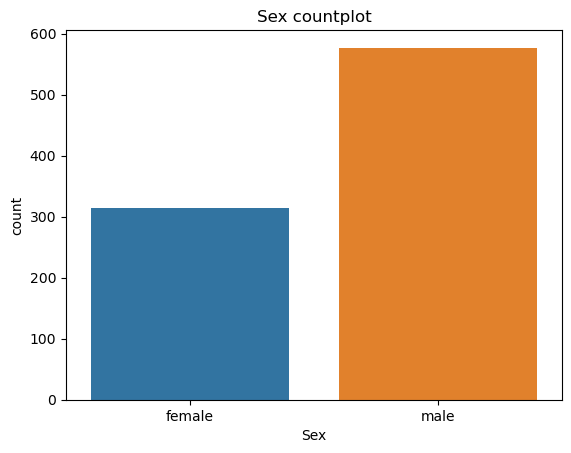

In [85]:
plt.title("Sex countplot")
sns.countplot(x="Sex", data=updated_titanic);

In [86]:
updated_titanic.SibSp.value_counts(normalize=True, dropna=False)

0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64

In [87]:
updated_titanic.SibSp.describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [88]:
updated_titanic.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

The Sibling/Spouses countplot below shows how many passengers had Sibling/Spouses on the titanic.

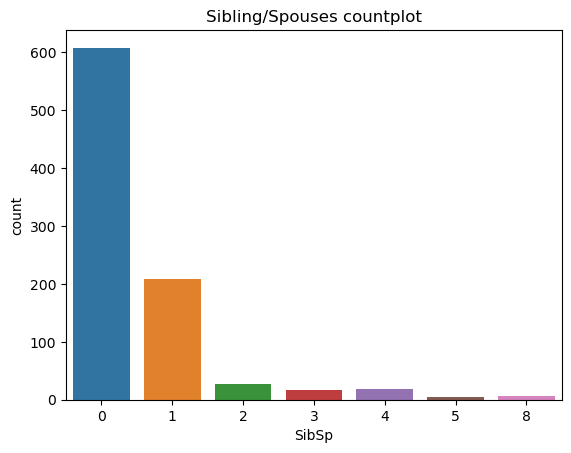

In [89]:
plt.title("Sibling/Spouses countplot")
sns.countplot(x="SibSp", data=updated_titanic);

In [90]:
updated_titanic.Parch.value_counts(normalize=True, dropna=False)

0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64

In [91]:
updated_titanic.Parch.describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [92]:
updated_titanic.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

The Parent/child countplot below shows how many passengers had Parent/child on the titanic.

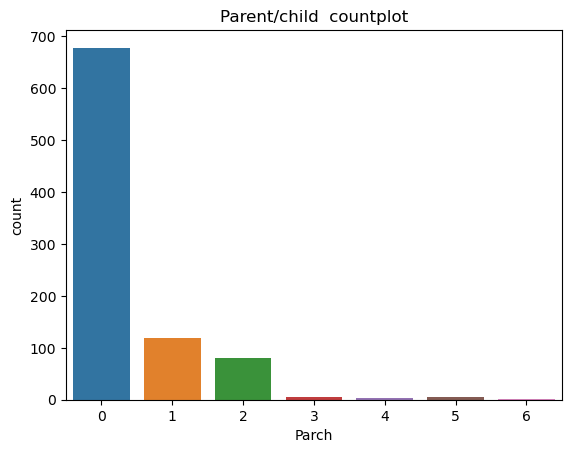

In [93]:
plt.title("Parent/child  countplot")
sns.countplot(x="Parch", data=updated_titanic);

In [94]:
updated_titanic.Pclass.value_counts(normalize=True, dropna=False)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [95]:
updated_titanic.Pclass.describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

In [96]:
updated_titanic.Pclass.unique()

array([3, 1, 2], dtype=int64)

The Pclass countplot below shows how many passengers were in first, second and thirs class on the titanic.

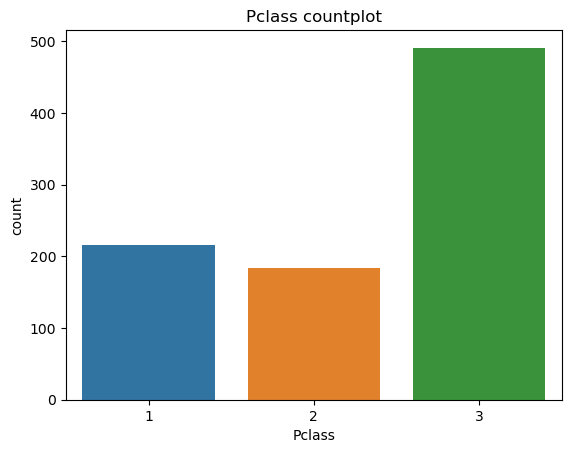

In [97]:
plt.title("Pclass countplot")
sns.countplot(x="Pclass", data=updated_titanic);

The Fare histplot below shows how many fares were bought at each price.

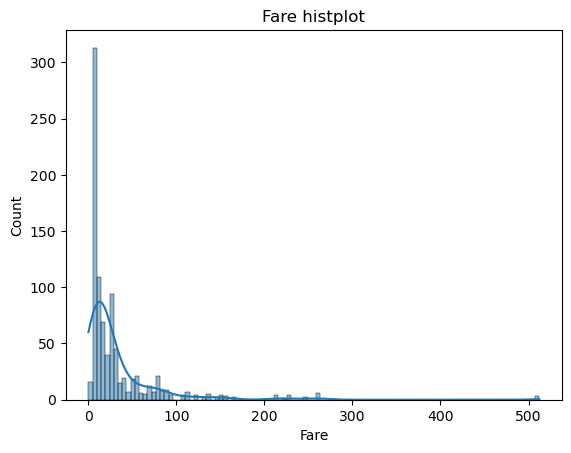

In [98]:
plt.title("Fare histplot")
sns.histplot(x="Fare", data= updated_titanic, kde=True);

Checking id there is a relationship between Pclass and Fare.

In [99]:
updated_titanic[["Pclass", "Fare"]].corr()

,Pclass,Fare
Pclass,1.0000,-0.5495
Fare,-0.5495,1.0000


the implot of Pclass and Fare below measures the strength of the linear relationship between Pclass and Fare. Correlation coefficient, r = -0.55, shows There is a strong negative linear relationship between Pclass and Fare because the Fare price decreases with worse passenger classes.

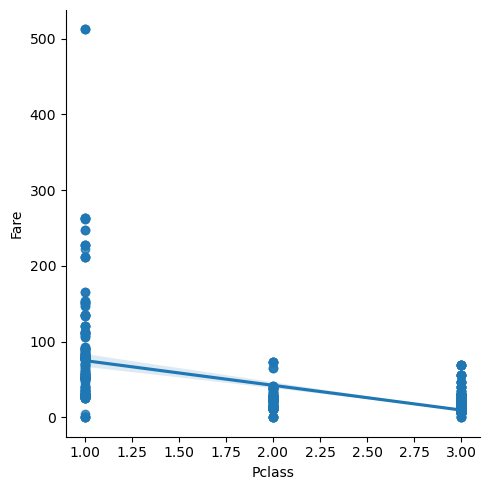

In [100]:
sns.lmplot(x="Pclass", y="Fare", data= updated_titanic);

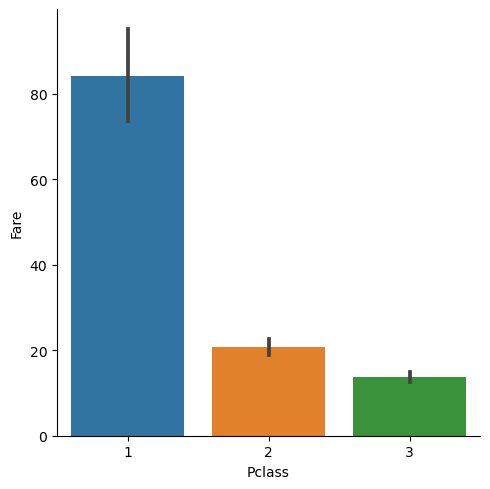

In [101]:
sns.catplot(x="Pclass", y="Fare", data=updated_titanic, kind='bar');

The catplot below shows the Fare price of each ticket. The most expensive ticket being over 500.

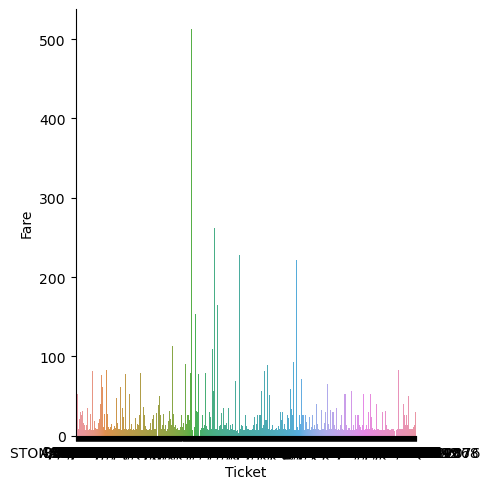

In [102]:
sns.catplot(x="Ticket", y="Fare", data=updated_titanic, kind='bar');

##End of Answer 2##

# Task 3: Third pass - relationships between features and target

##Start of Answer 3##

Checking if there is a relationship between Pclass, SibSp, Parch, Fare, Has_Cabin and Age.

In [103]:
corr = updated_titanic[["Pclass", "SibSp", "Parch", "Fare", "Has_Cabin", "Age"]].corr()
corr

,Pclass,SibSp,Parch,Fare,Has_Cabin,Age
Pclass,1.000000,0.083081,0.018443,-0.549500,-0.725541,-0.334974
SibSp,0.083081,1.000000,0.414838,0.159651,-0.040460,-0.232978
Parch,0.018443,0.414838,1.000000,0.216225,0.036987,-0.176486
Fare,-0.549500,0.159651,0.216225,1.000000,0.482075,0.093706
Has_Cabin,-0.725541,-0.040460,0.036987,0.482075,1.000000,0.236162
Age,-0.334974,-0.232978,-0.176486,0.093706,0.236162,1.000000


the heatmap of Pclass, SibSp, Parch, Fare, Has_Cabin and Age below measures the strength of the linear relationship between Pclass, SibSp, Parch, Fare, Has_Cabin and Age.
Correlation coefficient between Pclass and Sibling/Spouses , r = 0.08, shows There is a weak positive linear relationship. 
Correlation coefficient between Pclass and Parch , r = 0.02, shows There is a weak positive linear relationship. 
Correlation coefficient between Pclass and Fare , r = -0.55, shows There is a strong negative linear relationship.
Correlation coefficient between Pclass and Has_Cabin , r = -0.73, shows There is a strong negative linear relationship.
Correlation coefficient between Pclass and Age , r = -0.33, shows There is a moderate negative linear relationship.

Correlation coefficient between Sibling/Spouses and Parch , r = 0.41, shows There is a moderate positive linear relationship. 
Correlation coefficient between Sibling/Spouses and Fare , r = 0.16, shows There is a weak positive linear relationship.
Correlation coefficient between Sibling/Spouses and Has_Cabin , r = -0.04, shows There is a weak negative linear relationship.
Correlation coefficient between Sibling/Spouses and Age , r = -0.23, shows There is a moderate negative linear relationship.
 
Correlation coefficient between Parch and Fare , r = 0.22, shows There is a weak positive linear relationship.
Correlation coefficient between Parch and Has_Cabin , r = 0.04, shows There is a weak positive linear relationship.
Correlation coefficient between Parch and Age , r = -0.18, shows There is a moderate negative linear relationship.

Correlation coefficient between Fare and Has_Cabin , r = 0.48, shows There is a strong positive linear relationship.
Correlation coefficient between Fare and Age , r = 0.09, shows There is a weak positive linear relationship.

Correlation coefficient between Has_Cabin and Age , r = 0.23, shows There is a weak positive linear relationship.

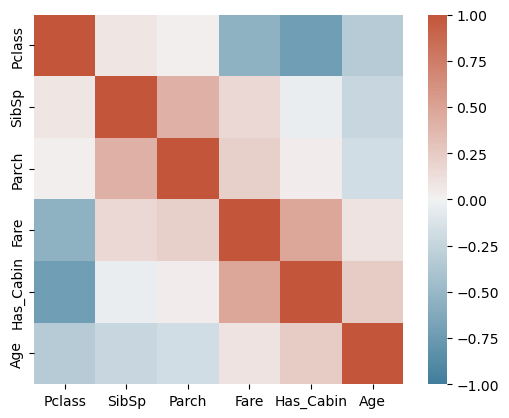

In [104]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, square=True, vmin=-1, vmax=1, cmap=cmap);

Checking if there is a relationship between Pclass, SibSp, Parch, Fare, Has_Cabin and Age using the spearman method.

In [105]:
corr = updated_titanic[["Pclass", "SibSp", "Parch", "Fare", "Has_Cabin", "Age"]].corr(method='spearman')
corr

,Pclass,SibSp,Parch,Fare,Has_Cabin,Age
Pclass,1.000000,-0.043019,-0.022801,-0.688032,-0.683291,-0.311679
SibSp,-0.043019,1.000000,0.450014,0.447113,0.052421,-0.145831
Parch,-0.022801,0.450014,1.000000,0.410074,0.080353,-0.216794
Fare,-0.688032,0.447113,0.410074,1.000000,0.539300,0.120924
Has_Cabin,-0.683291,0.052421,0.080353,0.539300,1.000000,0.225246
Age,-0.311679,-0.145831,-0.216794,0.120924,0.225246,1.000000


the heatmap of Pclass, SibSp, Parch, Fare, Has_Cabin and Age below measures the strength of the linear relationship between Pclass, SibSp, Parch, Fare, Has_Cabin and Age.
Correlation coefficient between Pclass and Sibling/Spouses , r = -0.04, shows There is a weak negative linear relationship. 
Correlation coefficient between Pclass and Parch , r = -0.02, shows There is a weak megative linear relationship. 
Correlation coefficient between Pclass and Fare , r = -0.69, shows There is a strong negative linear relationship.
Correlation coefficient between Pclass and Has_Cabin , r = -0.68, shows There is a strong negative linear relationship.
Correlation coefficient between Pclass and Age , r = -0.31, shows There is a moderate negative linear relationship.

Correlation coefficient between Sibling/Spouses and Parch , r = 0.45, shows There is a moderate positive linear relationship. 
Correlation coefficient between Sibling/Spouses and Fare , r = 0.45, shows There is a moderate positive linear relationship.
Correlation coefficient between Sibling/Spouses and Has_Cabin , r = 0.52, shows There is a strong positive linear relationship.
Correlation coefficient between Sibling/Spouses and Age , r = -0.14, shows There is a moderate negative linear relationship.
 
Correlation coefficient between Parch and Fare , r = 0.41, shows There is a moderate positive linear relationship.
Correlation coefficient between Parch and Has_Cabin , r = 0.08, shows There is a weak positive linear relationship.
Correlation coefficient between Parch and Age , r = -0.22, shows There is a moderate negative linear relationship.

Correlation coefficient between Fare and Has_Cabin , r = 0.53, shows There is a strong positive linear relationship.
Correlation coefficient between Fare and Age , r = 0.12, shows There is a weak positive linear relationship.

Correlation coefficient between Has_Cabin and Age , r = 0.23, shows There is a weak positive linear relationship.

<Axes: >

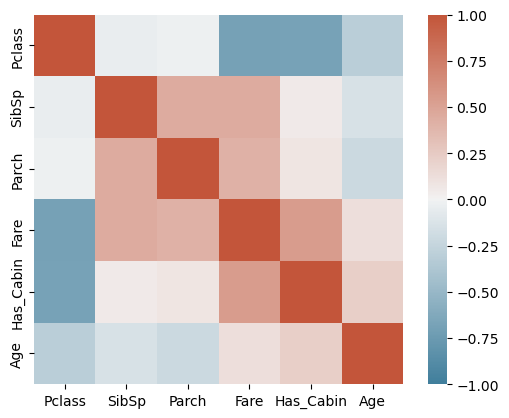

In [106]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, square=True, vmin=-1, vmax=1,cmap = cmap)

The scatterplot below shows the fare price for each passenger and if they have a cabin or not. The three most expensive fares were over 500 and only 2 of them had a cabin.most passengers with faures under 50 did not have a cabin.

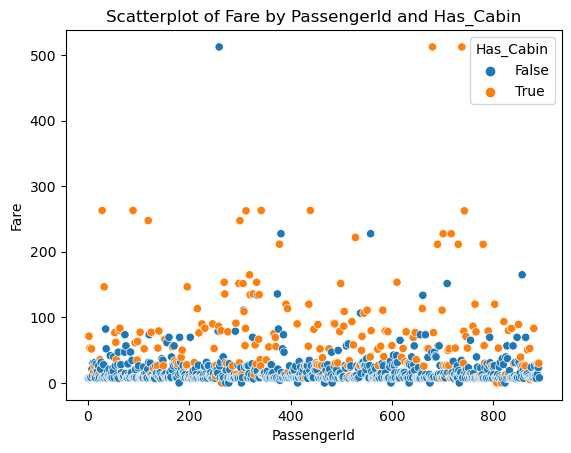

In [107]:
plt.title("Scatterplot of Fare by PassengerId and Has_Cabin")
sns.scatterplot(x="PassengerId", y="Fare", hue="Has_Cabin", data=updated_titanic);

The violin plot below shows the fare for passenger class and what sex they are. The Pclass with the most expensice fare was first class. The average fare price for all the clases were between 50 and 100. There were more males who bought a Fare for between 50 and 100 than females.

Text(0.5, 1.0, 'Violin Plot of Fare by Pclass and Sex')

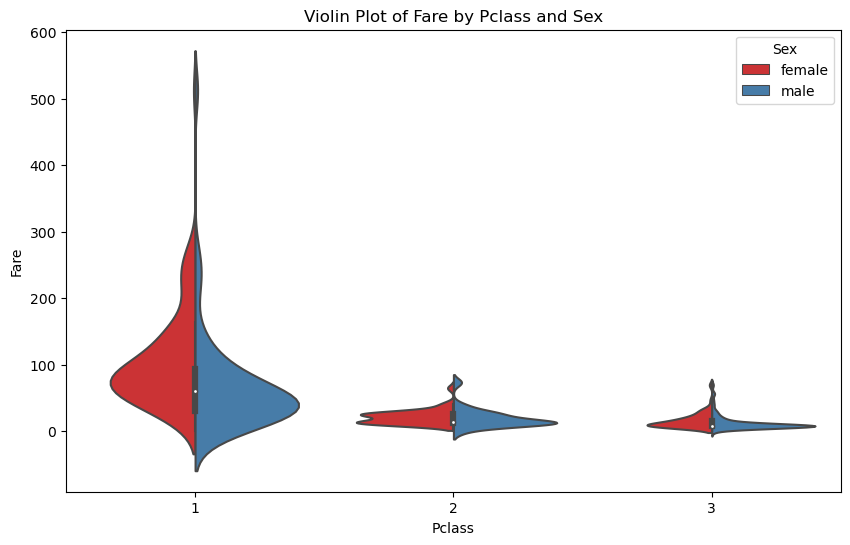

In [108]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="Pclass", y="Fare", hue="Sex", data=updated_titanic, split=True, palette="Set1")
plt.title("Violin Plot of Fare by Pclass and Sex")

The swarmplot below shows the amount of females and males survived based on their age. There were more females that survived than males.There were more females and males aged between 20 and 40. There was a male who was age 80 and survived.

C:\Users\willi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\willi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Age', ylabel='Sex'>

C:\Users\willi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\willi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


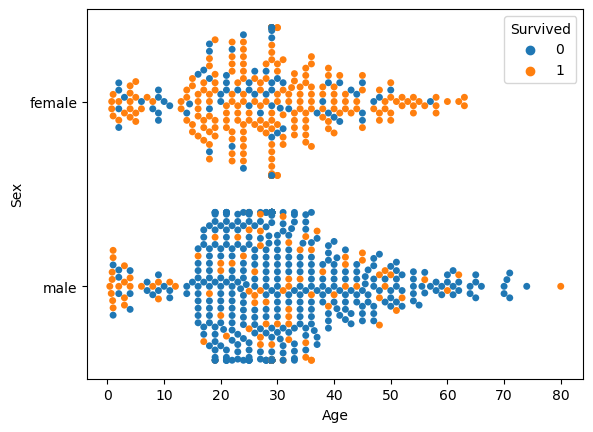

In [109]:
sns.swarmplot(data=updated_titanic, x="Age", y="Sex", hue="Survived")

The swarmplot below shows the amount of females and males that survived based on their fare price. Most males with a fare price of under 100 did not survive and most females with a fare price of under a 100 survived. 

C:\Users\willi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\willi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 56.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Fare', ylabel='Sex'>

C:\Users\willi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 43.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\willi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 66.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


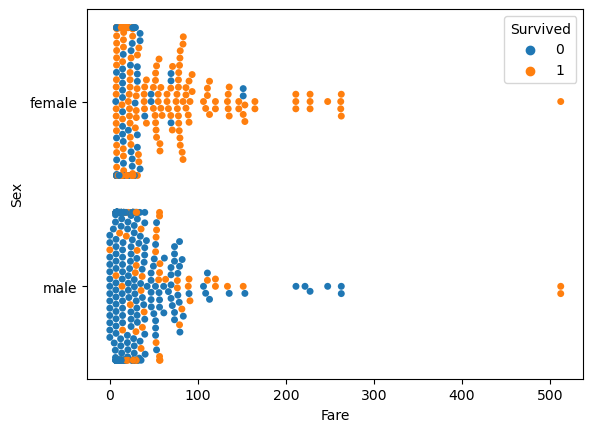

In [110]:
sns.swarmplot(data=updated_titanic, x="Fare", y="Sex", hue="Survived")

The swarmplot below shows the amount of males and females in each class based on age. There were more males in third class than females. 

C:\Users\willi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\willi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 31.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Pclass', ylabel='Age'>

C:\Users\willi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\willi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 38.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


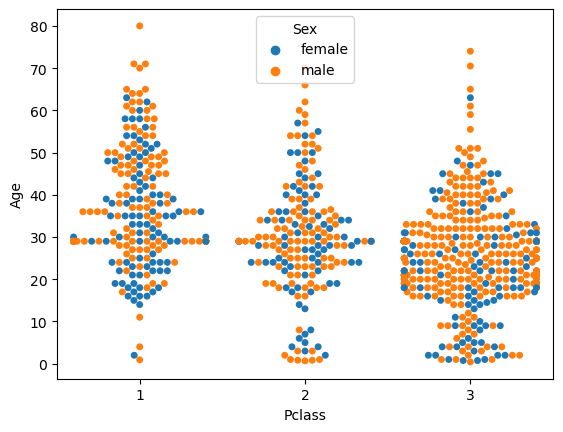

In [111]:
sns.swarmplot(data=updated_titanic, x="Pclass", y="Age", hue="Sex")

The swarmplot below shows the amount of females and males that have a cabin or dont have a cabin baes on age. There were more females that had a cabin that males. most males between 20 and 40 did not have a cabin.

C:\Users\willi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\willi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Age', ylabel='Sex'>

C:\Users\willi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\willi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


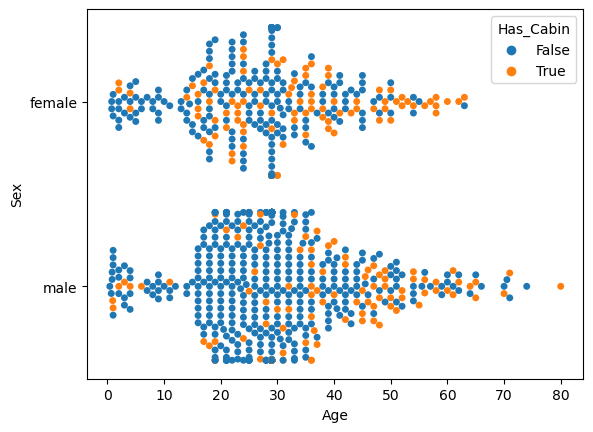

In [112]:
sns.swarmplot(data=updated_titanic, x="Age", y="Sex", hue="Has_Cabin")

##End of Answer 3##

##End of EDA 2##